In [31]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from scipy.spatial import distance

# 1.0

In [32]:
SampleSet = range(3)
SubSeq = np.array([2,0,1])
n = 10000
z = np.random.choice(SampleSet,n)

In [33]:
start = time.time()
cnt = 0
for i in range(n-2):
    if z[i]==2 and z[i+1]==0 and z[i+2]==1:
        cnt=cnt+1
end= time.time()
print('runtime: ' ,end-start)
print('number of apparences of (2,0,1): ',cnt)

runtime:  0.009999752044677734
number of apparences of (2,0,1):  390


In [34]:
start = time.time()
Shift1=np.roll(z,n-1)
Shift2=np.roll(z,n-2)
Shift1[n-1],Shift2[n-1],Shift2[n-2]=-99999,-99999,-99999
ans=np.logical_and(Shift2==1,np.logical_and(z==2,Shift1==0))
end= time.time()
print('runtime: ' ,end-start)
print('number of apparences of (2,0,1): ',cnt)

runtime:  0.019999980926513672
number of apparences of (2,0,1):  390


# 1.1a

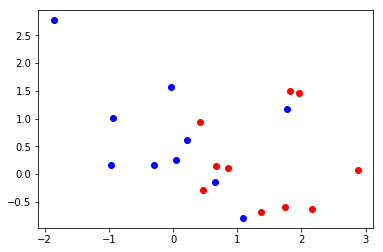

In [5]:
SampleSize = 10
meana=np.array([1.5, 0])
meanb= np.array([0,1.5])
var=np.eye(2,2)
a= np.random.multivariate_normal(meana, var, SampleSize)
b= np.random.multivariate_normal(meanb, var, SampleSize)
plt.plot(a[:,0],a[:,1],'ro')
plt.plot(b[:,0],b[:,1],'bo')
plt.show()

# 1.1b

(100, 2)
(100, 3)


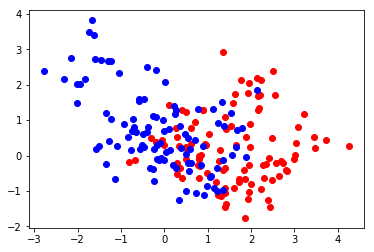

In [6]:
SampleSet = range(10)
n = 100
Indx = np.random.choice(SampleSet,2*n)
eps1=np.random.multivariate_normal([0,0], 1/4*np.eye(2,2), n)
eps2=np.random.multivariate_normal([0,0], 1/4*np.eye(2,2), n)
x1= a[Indx[0:n]]+eps1
x2= b[Indx[n:2*n]]+eps2
print(x1.shape)

x1=np.insert(x1,2,1,axis=1)

print(x1.shape)
x2= np.insert(x2,2,0,axis=1)

Data1 = np.concatenate((x1,x2))
plt.plot(Data1[0:n,0],Data1[0:n,1],'ro',Data1[n:2*n,0],Data1[n:2*n,1],'bo')
plt.show()

# 1.2

In [7]:
# Solve LLS
# returns coefficients for classifiying line a_0x_0 + ... + a_(d-1)x_(d-1) + a_d = 0.5
def LLS(X): #X a (n,d) numpy array with d-1 dependent variables and 1 independent variable
    n = X.shape[0]
    d = X.shape[1]
    X = np.insert(X,d-1,1,axis=1) # add column of 1s for constant term
    x = X[:,0:d] # dependent variable
    y = X[:,d] # independent variable
    y=y.reshape(n,1)
    c=x.T@x
    return(np.linalg.solve(c,x.T@y)) 

In [8]:
# Gives a scatter plot of labeled data with Sperating Hyperplane
# Input should be a (n,3) matrix with the first 2 columns the dependent variables and the last column the dependent variable (should be 0s and 1s)
def conplot(X):
    alpha=LLS(X)
    maxx = np.amax(X[:,0])
    maxy = np.amax(X[:,1])
    minx = np.amin(X[:,0])
    miny = np.amin(X[:,1])
    t = np.arange(minx-1, maxx+1, 0.1)
    s = np.arange(miny-1, maxy+1, 0.1)
    p,q = np.meshgrid(t, s, sparse=True)
    z = alpha[1,0]*q+alpha[0,0]*p + alpha[2,0]
    h = plt.contourf(t,s,z,[-99999,0.5,99999], colors=['blue','red'],alpha=0.5)
    plt.plot(X[X[:,2]==1][:,0],X[X[:,2]==1][:,1],'ro',X[X[:,2]==0][:,0],X[X[:,2]==0][:,1],'bo')

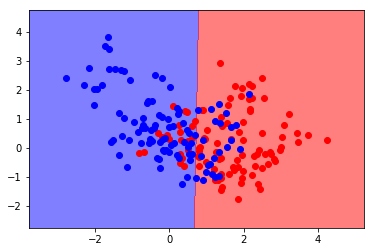

In [9]:
conplot(Data1)
plt.show()

# 1.3

In [10]:
# Confusion Matrix
#Prints out the Confusion Matrix and the Accuracy and returns the Confusion Matrix
def confusion(X,alpha):
    n=X.shape[0]
    d=X.shape[1]-1
    Xevaled = X[:,0:d].dot(alpha[0:d,0])+alpha[d,0]
    C10=np.sum(np.logical_and([Xevaled>0.5],X[:,d]==0))
    C00=np.sum(np.logical_and([Xevaled<0.5],X[:,d]==0))
    C01=np.sum(np.logical_and([Xevaled<0.5],X[:,d]==1))
    C11=np.sum(np.logical_and([Xevaled>0.5],X[:,d]==1))
    C=[[C00,C01],[C10,C11]]
    print("Confusion matrix: ", C)
    print("accuracy: " , np.trace(C)/n)
    return(C)

In [11]:
confusion(Data1,LLS(Data1))

Confusion matrix:  [[76, 22], [24, 78]]
accuracy:  0.77


[[76, 22], [24, 78]]

# 1.4

In [12]:


n = 10000 # number of samples

#Create Random Data around sample from 1.1
SampleSet = range(SampleSize)
Indx = np.random.choice(SampleSet,2*n)
eps1=np.random.multivariate_normal([0,0], 1/4*np.eye(2,2), n)
eps2=np.random.multivariate_normal([0,0], 1/4*np.eye(2,2), n)
x1= a[Indx[0:n]]+eps1
x2= b[Indx[n:2*n]]+eps2

#label Data
x1= np.insert(x1,2,1,axis=1)
x2= np.insert(x2,2,0,axis=1)
Data2 = np.concatenate((x1,x2))

alpha = LLS(Data2)

C=confusion(Data2,alpha)

Confusion matrix:  [[7301, 2317], [2699, 7683]]
accuracy:  0.7492


# 1.5

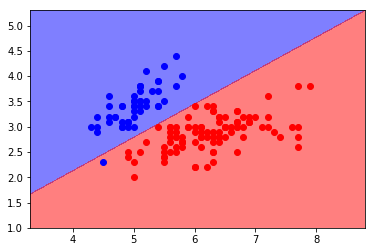

Confusion matrix:  [[50, 0], [0, 100]]
accuracy:  1.0


[[50, 0], [0, 100]]

In [13]:
#load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
irisDataFrame1 = pd.read_csv(url , header=None)

#label Data (versicolor , virginica = 1, setosa = 0)
irisDataFrame1['label'] = irisDataFrame1.iloc[:,4].isin(['Iris-versicolor','Iris-virginica']).astype(int)

# plot based on 1st 2 attributes
IrisArray1 = np.array(irisDataFrame1.loc[:,[0,1,'label']])
conplot(IrisArray1)
plt.show()

# accuracy based on all attributes
IrisArray2 = np.array(irisDataFrame1.loc[:,[0,1,2,3,'label']])
confusion(IrisArray2,LLS(IrisArray2))

# 1.6

In [98]:
def J(a,x,y):
    n=x.shape[0]
    return (1/n)*np.sum((x@a-y)**2)
    
def GradJ(a,x,y):
    n=x.shape[0]
    return (2/n)*np.sum((x.dot(a)-y)*x,axis=0).reshape(a.shape)

def LLSGrad(X,nu,graph,a):
    n = X.shape[0]
    d = X.shape[1]
    X = np.insert(X,d-1,1,axis=1) # add column of 1s for constant term
    x = X[:,0:d] # dependent variable
    y = X[:,d].reshape(n,1) # independent variable
    
    maxSteps=np.ceil(10/nu)
    tol = 0.1
    
    step = 0
    Vals = np.array([[step],[J(a,x,y)]])
    while (np.sum(np.abs(GradJ(a,x,y)))>tol ) and (step < maxSteps):
        a = a - nu * GradJ(a,x,y)
        step = step + 1
        if graph:
            Vals=np.concatenate((Vals,np.array([[step],[J(a,x,y)]])),axis=1)
        if(step==maxSteps):
            return np.zeros(1)
    if graph:                        
        return Vals
    return(a)


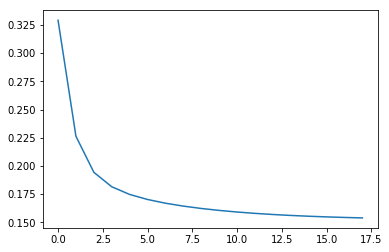

In [99]:
nu=1 
d = Data1.shape[1]
a= np.random.rand(d).reshape(d,1)
MaxNu=4
count=0
while (np.all(LLSGrad(Data1,nu,False,a))==np.array([0])) and (count < MaxNu):
    nu=nu*0.1
    count = count + 1
if (count == MaxNu):
    print('Failed to converge')
else:
    Vals = LLSGrad(Data1,nu,True,a)
    plt.plot(Vals[0,:],Vals[1,:])
    plt.show()

# 1.7

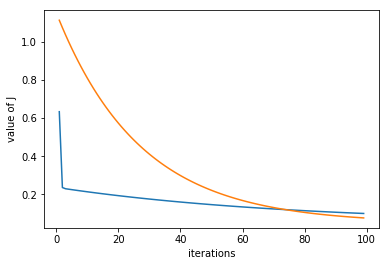

In [104]:
IrisMean = np.mean(IrisArray1[:,:2], 0)
IrisSD = np.std(IrisArray1[:,:2],0)
normIris = np.divide(np.subtract(IrisArray1[:,:2], IrisMean), IrisSD)
y = np.array([IrisArray1[:,2]])
normIris = np.concatenate((normIris, y.T), axis = 1)

nu=1 
d = normIris.shape[1]
a= np.random.rand(d).reshape(d,1)
MaxNu=4
count=0
while (np.all(LLSGrad(normIris,nu,False,a))==np.array([0]) or np.all(LLSGrad(IrisArray1,nu,False,a))==np.array([0])) and (count < MaxNu):
    nu=nu*0.1
    count = count + 1
if (count == MaxNu):
    print('Failed to converge')
else:
    ValsNorm = LLSGrad(normIris,nu,True,a)
    Vals = LLSGrad(IrisArray1,nu,True,a)
    plt.plot(Vals[0,1:100],Vals[1,1:100], label = 'unnormalised')
    plt.plot(ValsNorm[0,1:100],ValsNorm[1,1:100], label = 'normalised')
    plt.xlabel('iterations')
    plt.ylabel('value of J')
    plt.show()


# 1.8

In [35]:
#k nearest neighbours algorithm for X 'known' data and Y 'unknown'
def nearNeigh(k,Y,X):
    n = X.shape[0]
    d = X.shape[1]
    
    eucDist = distance.cdist(Y,X[:,:-1])
    
    nearest = np.argpartition(eucDist,k,axis=1)[:,:k]
    
    avVal = np.zeros(Y.shape[0])
    for i in range(Y.shape[0]):
        avVal[i] = np.sum(X[nearest[i], d-1])
        avVal[i] = avVal[i]/k
    
    return avVal

In [36]:
# Confusion Matrix
#Prints out the Confusion Matrix and the Accuracy and returns the Confusion Matrix
def confusionkNN(X,Xevaled):
    n=X.shape[0]
    d=X.shape[1]-1
    C10=np.sum(np.logical_and([Xevaled>0.5],X[:,d]==0))
    C00=np.sum(np.logical_and([Xevaled<0.5],X[:,d]==0))
    C01=np.sum(np.logical_and([Xevaled<0.5],X[:,d]==1))
    C11=np.sum(np.logical_and([Xevaled>0.5],X[:,d]==1))
    C=[[C00,C01],[C10,C11]]
    print("Confusion matrix: ", C)
    print("accuracy: " , np.trace(C)/n)
    return(C)

In [37]:
#running k N.N. for k=1,15,30 
nearNeigh(1,Data1[:,:-1],Data1)
confusionkNN(Data1, nearNeigh(1,Data1[:,:-1],Data1))
nearNeigh(15,Data1[:,:-1],Data1)
confusionkNN(Data1, nearNeigh(15,Data1[:,:-1],Data1))
nearNeigh(30,Data1[:,:-1],Data1)
confusionkNN(Data1, nearNeigh(30,Data1[:,:-1],Data1))

Confusion matrix:  [[100, 0], [0, 100]]
accuracy:  1.0
Confusion matrix:  [[74, 15], [26, 85]]
accuracy:  0.795
Confusion matrix:  [[69, 16], [27, 78]]
accuracy:  0.735


[[69, 16], [27, 78]]

In [70]:
#method to plot the contour of 1/2 for k nearest neighbours
def plotkNNcon(X,k):
    #Meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    
    #colour map for mesh grid (apologies for the ugly colours)
    Z = nearNeigh(k,np.c_[xx.ravel(), yy.ravel()], X)
    Z = Z.reshape(xx.shape)
    Z = np.rint(Z)
    plt.figure()
    plt.pcolormesh(xx, yy, Z) 
    
    # Plot
    plt.scatter(X[:,0], X[:,1], c= X[:,2])
    plt.plot(X[X[:,2]==1][:,0],X[X[:,2]==1][:,1],'go',X[X[:,2]==0][:,0],X[X[:,2]==0][:,1],'bo')
    plt.title("k-nearest neighbours for k = %i" %k )
    plt.show()


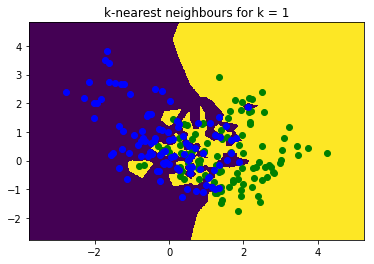

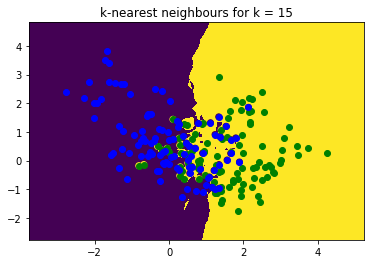

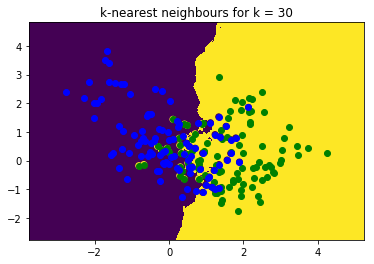

In [72]:
#plot the contour graph for k=1, 15, 30
plotkNNcon(Data1, 1)
plotkNNcon(Data1, 15)
plotkNNcon(Data1, 30)

# 1.9(a)

In [39]:
accuracy1 = np.zeros(200)
n = Data1.shape[0]
for k in range(199):
    C = confusionkNN(Data1, nearNeigh(k+1,Data1[:,:-1],Data1))
    accuracy1[k]= np.trace(C)/n

Confusion matrix:  [[100, 0], [0, 100]]
accuracy:  1.0
Confusion matrix:  [[79, 0], [0, 76]]
accuracy:  0.775
Confusion matrix:  [[88, 13], [12, 87]]
accuracy:  0.875
Confusion matrix:  [[68, 4], [7, 64]]
accuracy:  0.66
Confusion matrix:  [[79, 17], [21, 83]]
accuracy:  0.81
Confusion matrix:  [[64, 10], [8, 67]]
accuracy:  0.655
Confusion matrix:  [[78, 22], [22, 78]]
accuracy:  0.78
Confusion matrix:  [[69, 14], [12, 65]]
accuracy:  0.67
Confusion matrix:  [[83, 22], [17, 78]]
accuracy:  0.805
Confusion matrix:  [[72, 12], [13, 73]]
accuracy:  0.725
Confusion matrix:  [[77, 20], [23, 80]]
accuracy:  0.785
Confusion matrix:  [[71, 12], [17, 74]]
accuracy:  0.725
Confusion matrix:  [[74, 17], [26, 83]]
accuracy:  0.785
Confusion matrix:  [[73, 10], [19, 77]]
accuracy:  0.75
Confusion matrix:  [[74, 15], [26, 85]]
accuracy:  0.795
Confusion matrix:  [[70, 11], [21, 74]]
accuracy:  0.72
Confusion matrix:  [[71, 19], [29, 81]]
accuracy:  0.76
Confusion matrix:  [[70, 16], [27, 77]]
accur

Confusion matrix:  [[73, 25], [26, 75]]
accuracy:  0.74
Confusion matrix:  [[74, 25], [26, 75]]
accuracy:  0.745
Confusion matrix:  [[72, 25], [23, 75]]
accuracy:  0.735
Confusion matrix:  [[73, 25], [27, 75]]
accuracy:  0.74
Confusion matrix:  [[72, 22], [24, 75]]
accuracy:  0.735
Confusion matrix:  [[73, 22], [27, 78]]
accuracy:  0.755
Confusion matrix:  [[69, 18], [27, 78]]
accuracy:  0.735
Confusion matrix:  [[70, 18], [30, 82]]
accuracy:  0.76
Confusion matrix:  [[67, 18], [30, 81]]
accuracy:  0.74
Confusion matrix:  [[67, 18], [33, 82]]
accuracy:  0.745
Confusion matrix:  [[67, 15], [32, 82]]
accuracy:  0.745
Confusion matrix:  [[67, 15], [33, 85]]
accuracy:  0.76
Confusion matrix:  [[66, 14], [33, 82]]
accuracy:  0.74
Confusion matrix:  [[67, 15], [33, 85]]
accuracy:  0.76
Confusion matrix:  [[64, 13], [33, 85]]
accuracy:  0.745
Confusion matrix:  [[64, 13], [36, 87]]
accuracy:  0.755
Confusion matrix:  [[64, 11], [35, 87]]
accuracy:  0.755
Confusion matrix:  [[64, 11], [36, 89]

# 1.9(b)

In [ ]:
accuracy2 = np.zeros(200)
n = Data2.shape[0]
for k in range(199):
    C = confusionkNN(Data2, nearNeigh(k+1,Data2[:,:-1],Data1))
    accuracy2[k]= np.trace(C)/n

Confusion matrix:  [[6702, 3029], [3298, 6971]]
accuracy:  0.68365
Confusion matrix:  [[5468, 1492], [1914, 5426]]
accuracy:  0.5447
Confusion matrix:  [[6874, 2784], [3126, 7216]]
accuracy:  0.7045
Confusion matrix:  [[5735, 1543], [1801, 5882]]
accuracy:  0.58085
Confusion matrix:  [[7129, 2662], [2871, 7338]]
accuracy:  0.72335
Confusion matrix:  [[6131, 1460], [1935, 6136]]
accuracy:  0.61335
Confusion matrix:  [[7091, 2462], [2909, 7538]]
accuracy:  0.73145
Confusion matrix:  [[6422, 1601], [2028, 6421]]
accuracy:  0.64215
Confusion matrix:  [[7140, 2384], [2860, 7616]]
accuracy:  0.7378
Confusion matrix:  [[6524, 1615], [2152, 6741]]
accuracy:  0.66325
Confusion matrix:  [[7209, 2309], [2791, 7691]]
accuracy:  0.745
Confusion matrix:  [[6674, 1742], [2239, 7038]]
accuracy:  0.6856
Confusion matrix:  [[7165, 2193], [2835, 7807]]
accuracy:  0.7486
Confusion matrix:  [[6769, 1657], [2400, 7257]]
accuracy:  0.7013
Confusion matrix:  [[7136, 2078], [2864, 7922]]
accuracy:  0.7529
Conf

# 1.9(c)

In [80]:
#plot the accuracy against k for nearest neighbours
def accplot(accuracy, colour):
    y = accuracy
    x = np.arange(1, y.size +1, 1)
    area = np.pi*7
 
    # Plot
    plt.scatter(x, y, s=area, c=colour)
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.axis([0,201,np.amin(accuracy)-0.05,np.max(accuracy)+0.05])
    plt.show()

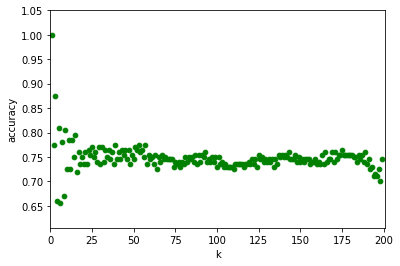

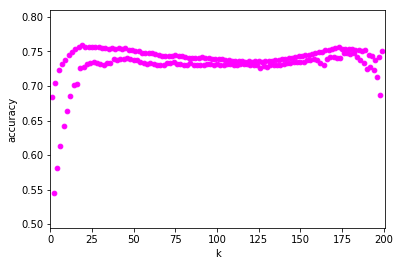

In [81]:
accplot(accuracy1[:-1],'green')
accplot(accuracy2[:-1],'magenta')